In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
import EWdata

BINS = 60

In [2]:
def extract_spec(fpath, eta, dx, nSize):
    h5file = EWdata.H5Reader(fpath)
    dset = h5file.dataset_
    c1 = EWdata.constants(eta = eta, dx = dx, nSize = nSize)
    fft_norm_factor = 1/(2.0*(c1.nSize()/c1.dx())**3) * 1/(c1.LatV()*c1.mH()**4)

    fourier = EWdata.FourierTransform(dset)
    fourier.fft()
    fourier.energy_spectrum()
    seps, vals = fourier.configure_magnitude_bins(BINS)
    spec = fourier.radial_spectrum(BINS)
    # norm_factor = 1/(2.0*(nSize/dx)**3) * 1/(LatV*mH**4)
    spec = spec*fft_norm_factor
    
    return vals, spec

In [27]:
h5file = EWdata.H5Reader(fpath1)
dset = h5file.dataset_
fourier = EWdata.FourierTransform(dset)
fourier.fft()
fourier.energy_spectrum()
seps, vals = fourier.configure_magnitude_bins(bins)
spec = fourier.radial_spectrum(bins)
fourier.max_k()

0.8660254037844386

### spectrum

In [13]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data/data_collect128'
fpath1 = os.path.join(root_path, 'raw_data_dx0.25', 'rnu_12_bfield.h5')
v1, s1 = extract_spec(fpath1, 6.0, 0.25, 128)
fpath2 = os.path.join(root_path, 'raw_data_dx0.167', 'rnu_112_bfield.h5')
v2, s2 = extract_spec(fpath2, 6.0, 0.166667, 192)
fpath3 = os.path.join(root_path, 'raw_data_dx0.125', 'rnu_212_bfield.h5')
v3, s3 = extract_spec(fpath3, 6.0, 0.125, 256)

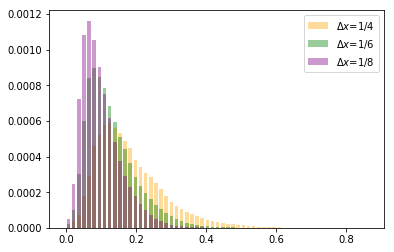

In [33]:
# The area is the magnetic enenrgy density in units of mH^4
plt.bar(v1, s1, align = 'center', width = 0.01, alpha = 0.4, color = 'orange', label = '$\Delta x$=1/4')
plt.bar(v2, s2, align = 'center', width = 0.01, alpha = 0.4, color = 'green', label = '$\Delta x$=1/6')
plt.bar(v3, s3, align = 'center', width = 0.01, alpha = 0.4, color = 'purple', label = '$\Delta x$=1/8')
plt.legend()
plt.show()

In [18]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data/data_collect128'
c1 = EWdata.constants(eta = 6.0, dx = 0.25, nSize = 128)
c2 = EWdata.constants(eta = 6.0, dx = 0.16667, nSize = 192)
c3 = EWdata.constants(eta = 6.0, dx = 0.125, nSize = 256)
df1 = pd.read_csv(os.path.join(root_path, 'raw_data_dx0.25', 'rnu_12_dtable.txt'))
df2 = pd.read_csv(os.path.join(root_path, 'raw_data_dx0.167', 'rnu_112_dtable.txt'))
df3 = pd.read_csv(os.path.join(root_path, 'raw_data_dx0.125', 'rnu_212_dtable.txt'))

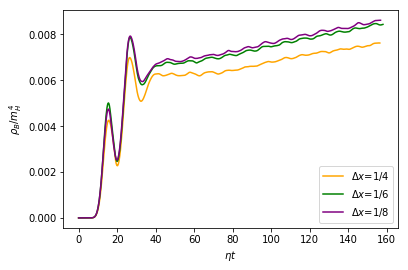

In [10]:
plt.plot(df1.index*c1.dt()*c1.eta(), df1['MagneticEnergy']/(c1.LatV()*c1.mH()**4), 
         color = 'orange', label = '$\Delta x$=1/4')
plt.plot(df2.index*c2.dt()*c2.eta(), df2['MagneticEnergy']/(c2.LatV()*c2.mH()**4), 
         color = 'green', label = '$\Delta x$=1/6')
plt.plot(df3.index*c3.dt()*c3.eta(), df3['MagneticEnergy']/(c3.LatV()*c3.mH()**4), 
         color = 'purple', label = '$\Delta x$=1/8')
plt.legend()
plt.xlabel('$\eta t$')
plt.ylabel('$\\rho_B/m_H^4$')
plt.show()

In [31]:
df1['MagneticEnergy'].iloc[-1] / (c1.LatV() * c1.mH()**4)

0.0076257823134550312

In [26]:
fourier.kenergy_.sum() * 1/(2.0*(c1.nSize()/c1.dx())**3) / c1.LatV() 

2.6314116779248877

In [32]:
spec.sum() * 1/(2.0*(c1.nSize()/c1.dx())**3) / (c1.LatV() * c1.mH()**4)

0.0076257821243931202